Comparing Weekend and Weekday Sales in Q4 2022 Scenario: The Campaign Team wants to evaluate the effectiveness of their weekend promotional campaigns (Saturdays and Sundays) between October and December 2022 by comparing the average daily sales during weekends vs weekdays. Requirements: 1. Calculate the average daily sales (before_discount) for weekends (Saturdays and Sundays) and weekdays (Monday to Friday) for each month (October, November, and December 2022). 2. Calculate the average sales for weekends vs weekdays for the entire three-month period. 3. Share insights on whether sales increased during weekends. Key Features to Use: • order_date (for filtering by date and identifying days of the week) • before_discount (for sales data) • month_id, month_name, day_name, year (for extracting date-related information)

📊 Average Daily Sales in Q4 2022 (Weekend vs Weekday by Month):
      month day_type  before_discount
4   October  Weekday       16172323.6
5   October  Weekend       14649214.0
2  November  Weekday       18904125.0
3  November  Weekend       15170130.0
0  December  Weekday       13616754.0
1  December  Weekend       14624409.0

📊 Overall Average Sales in Q4 2022 (Weekend vs Weekday):
  day_type  before_discount
0  Weekday     1.623452e+07
1  Weekend     1.479096e+07

⚠️ Insight: Weekend promotions were not effective — weekdays had higher average sales.


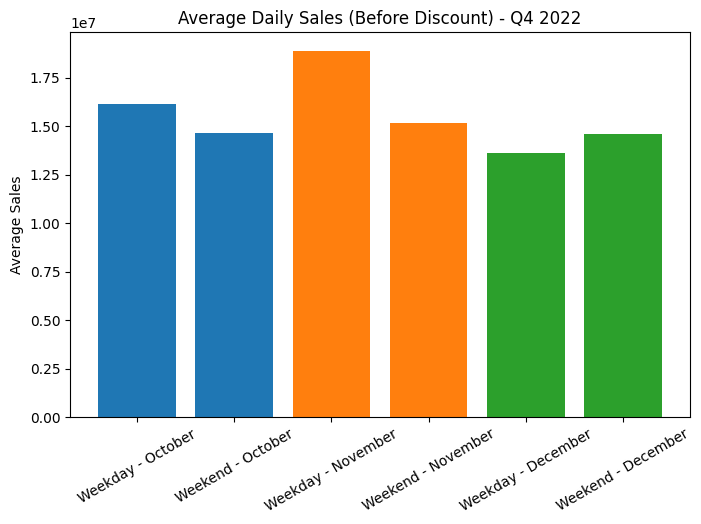

In [10]:
# 📌 Task 4: Comparing Weekend and Weekday Sales in Q4 2022

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load Dataset
file_path = r"C:\Users\bhave\OneDrive\Desktop\dashboard\dataset2\finaldataset.csv"
df = pd.read_csv(file_path)

# Step 2: Ensure order_date is datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Step 3: Filter for Q4 2022 (Oct, Nov, Dec 2022)
q4_df = df[(df['order_date'].dt.year == 2022) & (df['order_date'].dt.month.isin([10, 11, 12]))].copy()

# Step 4: Extract month & day info
q4_df['month'] = q4_df['order_date'].dt.month_name()
q4_df['day_name'] = q4_df['order_date'].dt.day_name()

# Step 5: Classify as Weekend or Weekday
q4_df['day_type'] = q4_df['day_name'].apply(lambda x: "Weekend" if x in ["Saturday", "Sunday"] else "Weekday")

# Step 6: Calculate daily sales (before_discount)
daily_sales = q4_df.groupby(['order_date', 'month', 'day_type'], as_index=False)['before_discount'].sum()

# Step 7: Average daily sales by month & day_type
monthly_avg = daily_sales.groupby(['month', 'day_type'], as_index=False)['before_discount'].mean()

# Sort months in calendar order
month_order = ["October", "November", "December"]
monthly_avg['month'] = pd.Categorical(monthly_avg['month'], categories=month_order, ordered=True)
monthly_avg = monthly_avg.sort_values(['month', 'day_type'])

# Step 8: Average sales for entire Q4 (Weekend vs Weekday)
overall_avg = daily_sales.groupby('day_type', as_index=False)['before_discount'].mean()

# Step 9: Display Results
print("📊 Average Daily Sales in Q4 2022 (Weekend vs Weekday by Month):")
print(monthly_avg)

print("\n📊 Overall Average Sales in Q4 2022 (Weekend vs Weekday):")
print(overall_avg)

# Step 10: Insight
weekend_avg = overall_avg.loc[overall_avg['day_type'] == 'Weekend', 'before_discount'].values[0]
weekday_avg = overall_avg.loc[overall_avg['day_type'] == 'Weekday', 'before_discount'].values[0]

if weekend_avg > weekday_avg:
    print("\n✅ Insight: Weekend promotions were effective — average sales were higher on weekends.")
else:
    print("\n⚠️ Insight: Weekend promotions were not effective — weekdays had higher average sales.")

# Step 11: Visualization
plt.figure(figsize=(8, 5))
for month in monthly_avg['month'].unique():
    data = monthly_avg[monthly_avg['month'] == month]
    plt.bar(data['day_type'] + " - " + month, data['before_discount'])

plt.title("Average Daily Sales (Before Discount) - Q4 2022")
plt.ylabel("Average Sales")
plt.xticks(rotation=30)
plt.show()
